In [1]:
import uproot
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
from tqdm import tqdm

In [2]:
path = '/users/wonsang1995/CWDataDir_ver0_Cf_2021_noOverlapped_vetoQcut_E10to20/v3/comb/FN/'
# path = '/users/wonsang1995/CWDataDir_ver0_Cf_2021_noOverlapped_vetoQcut_E10to60/v3/comb/FN/'

In [3]:
files = os.listdir(path)

  0%|          | 0/13 [00:00<?, ?it/s]

(514, 3) 1506


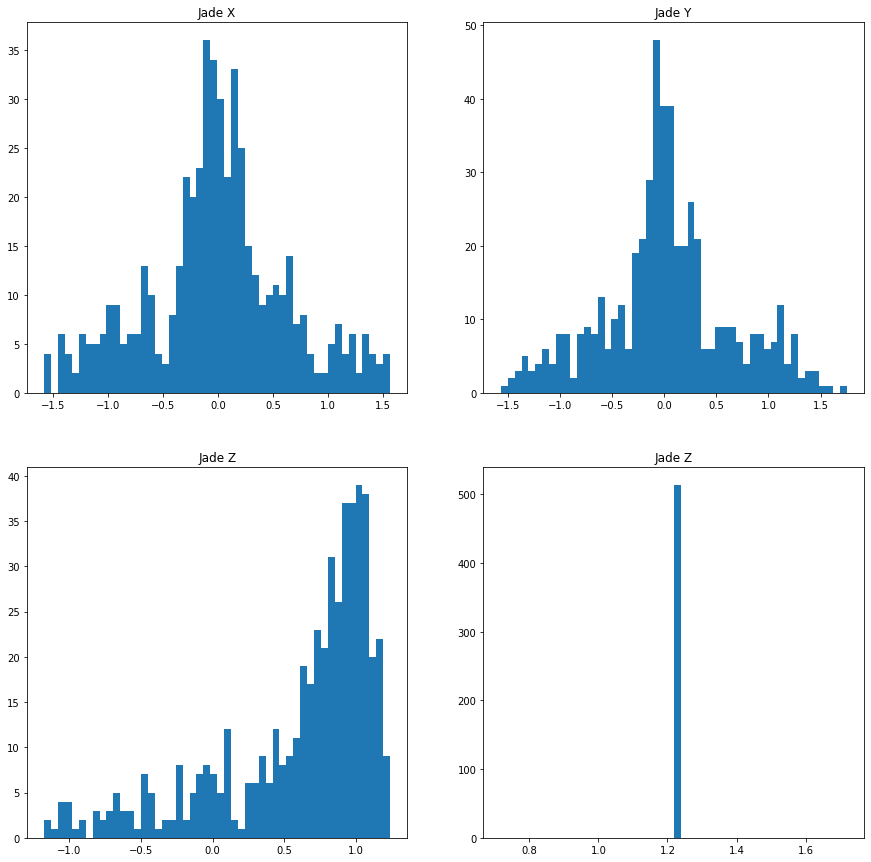

  8%|▊         | 1/13 [00:01<00:14,  1.22s/it]

(906, 3) 1509


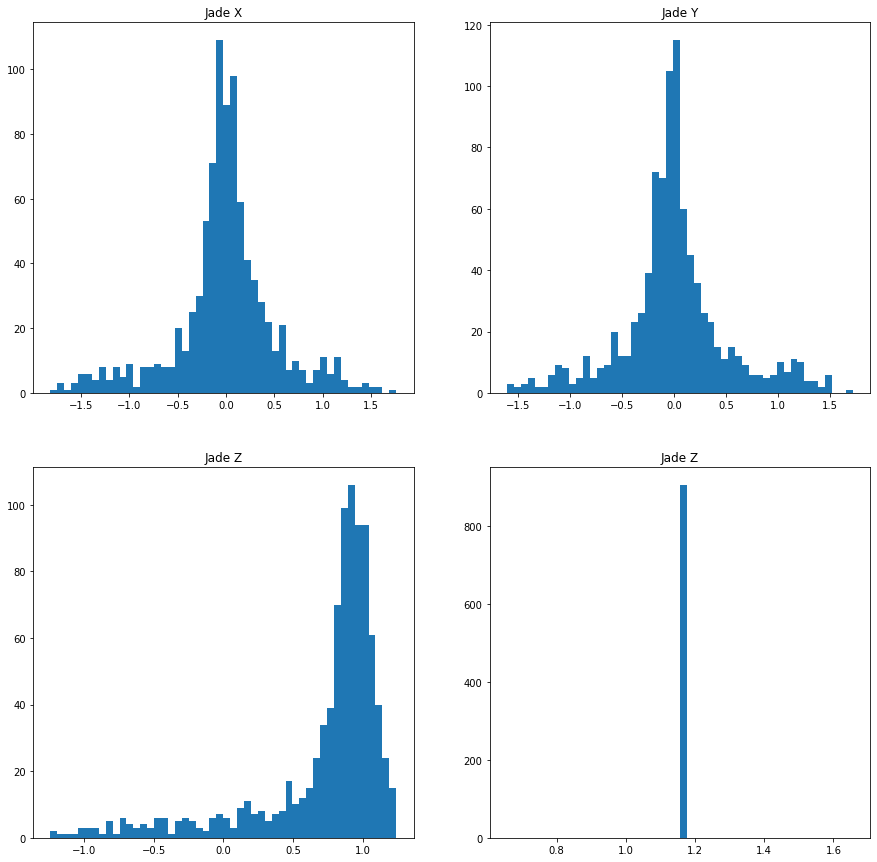

 15%|█▌        | 2/13 [00:02<00:12,  1.16s/it]

(1611, 3) 1510


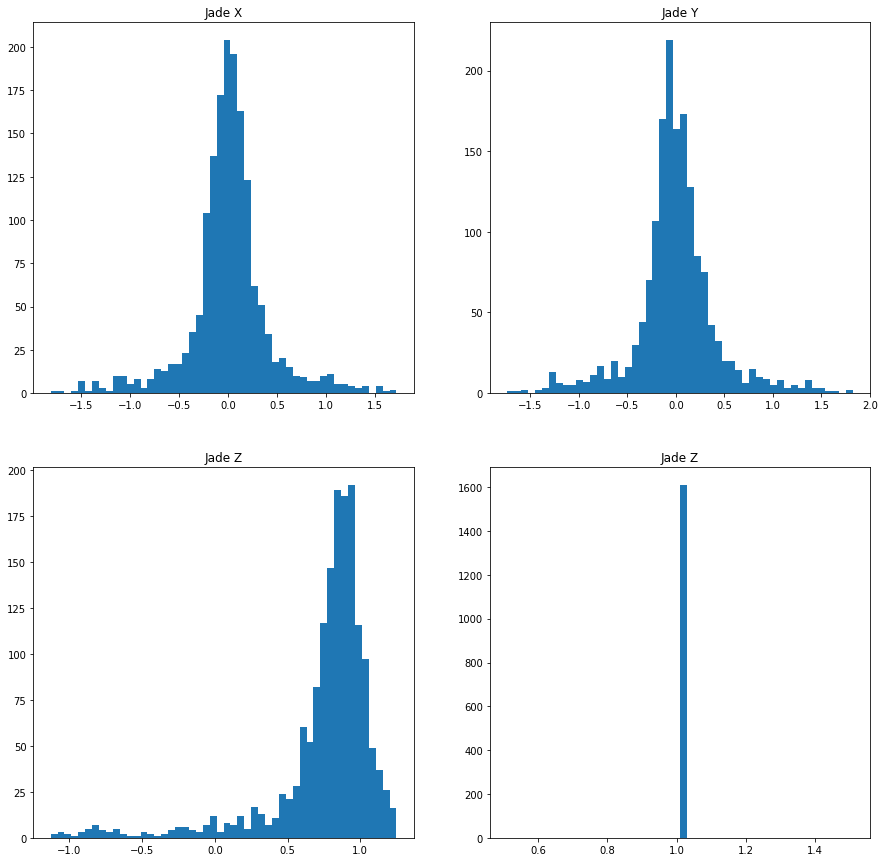

 23%|██▎       | 3/13 [00:03<00:11,  1.17s/it]

(2454, 3) 1511


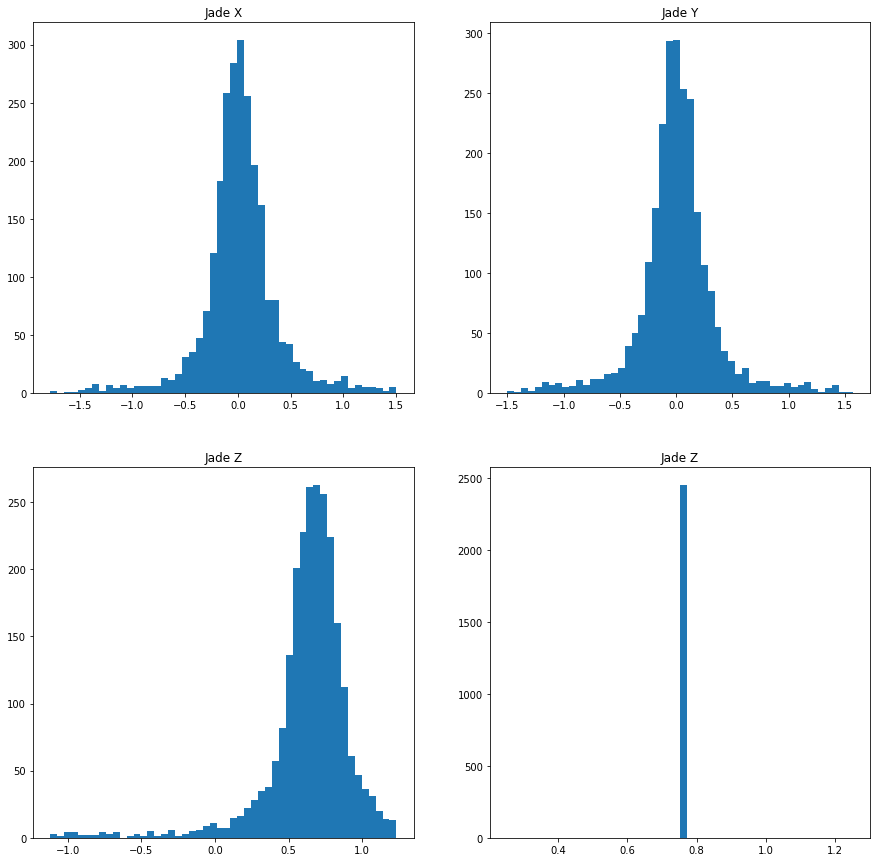

 31%|███       | 4/13 [00:04<00:10,  1.17s/it]

(2696, 3) 1512


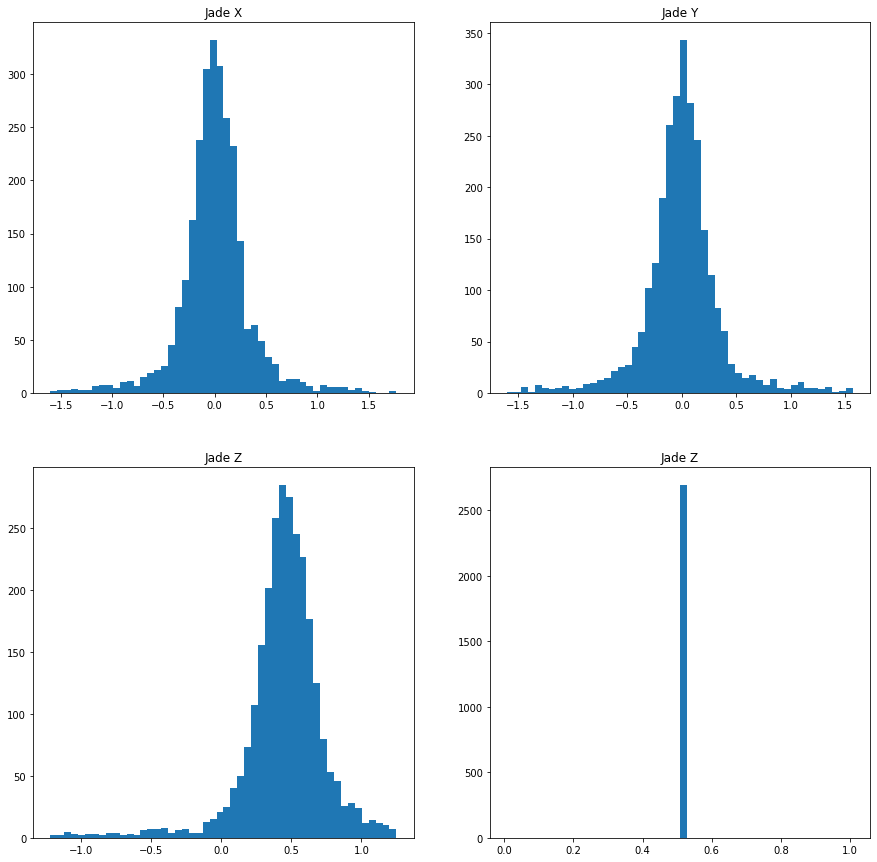

 38%|███▊      | 5/13 [00:05<00:09,  1.17s/it]

(2872, 3) 1513


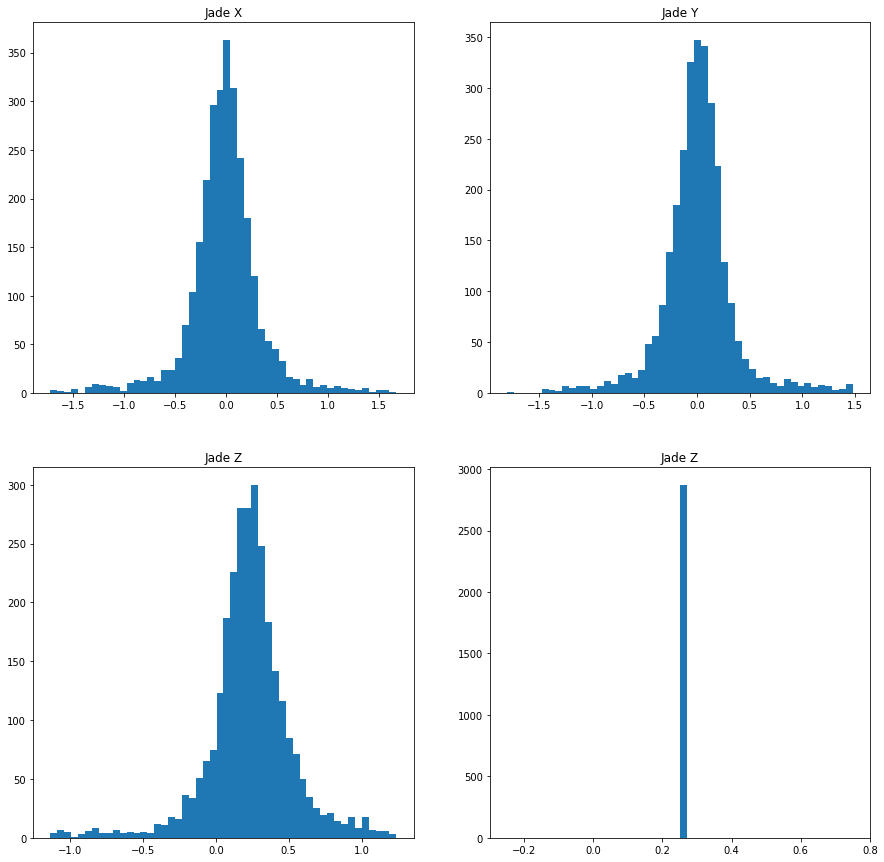

 46%|████▌     | 6/13 [00:07<00:08,  1.17s/it]

(2792, 3) 1517


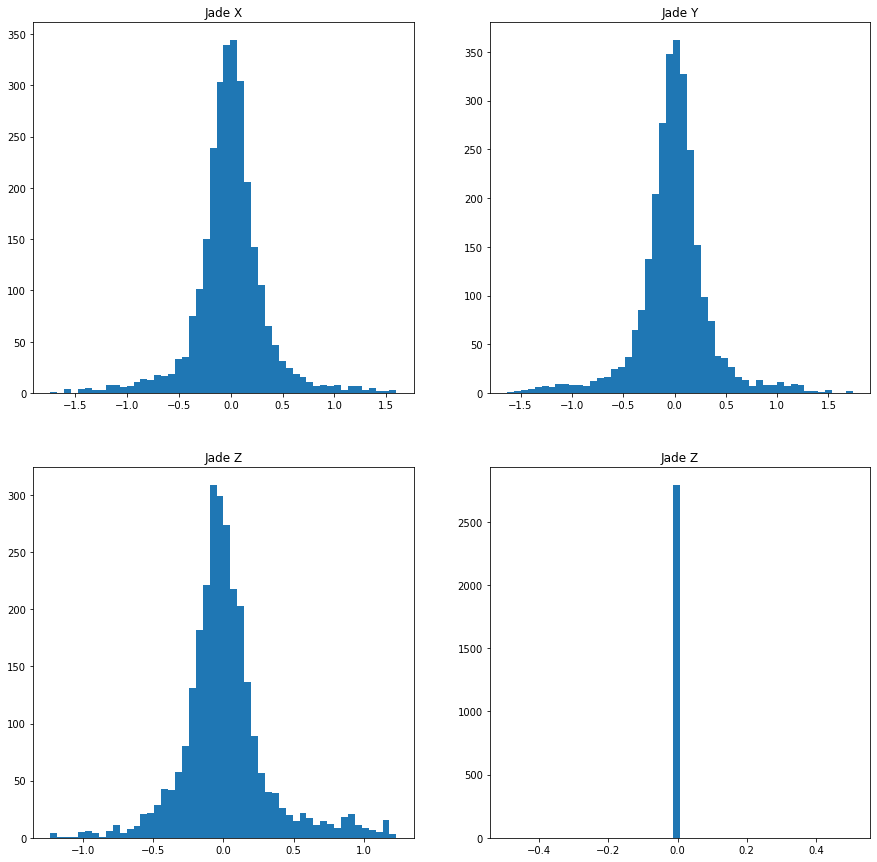

 54%|█████▍    | 7/13 [00:08<00:07,  1.19s/it]

(2771, 3) 1518


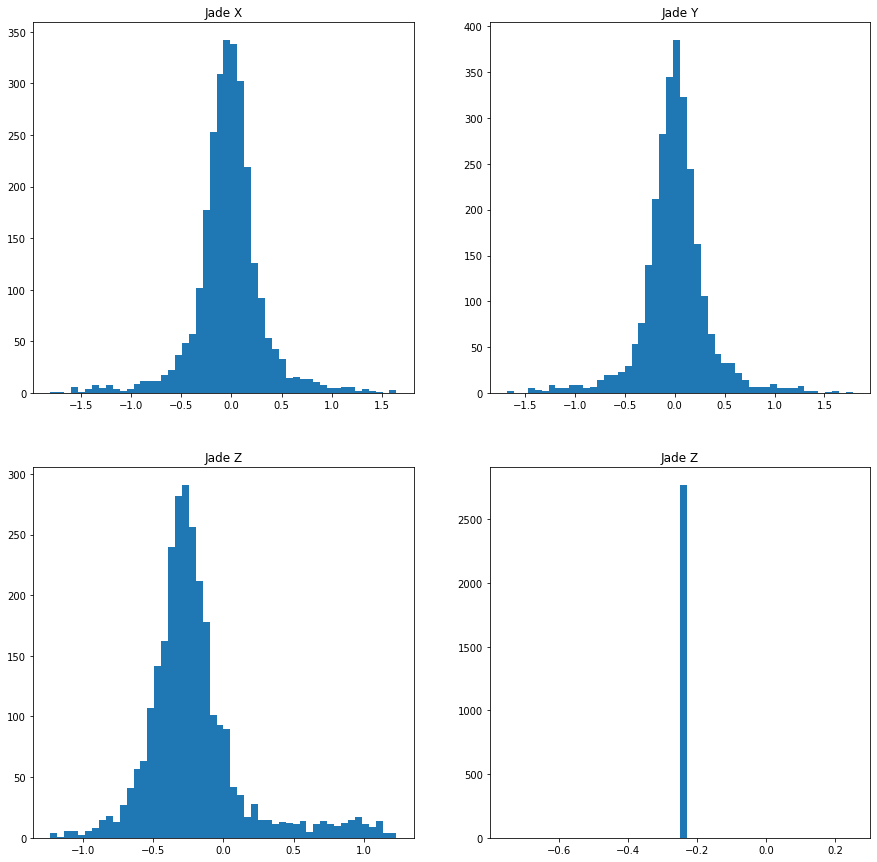

 62%|██████▏   | 8/13 [00:09<00:05,  1.18s/it]

(2709, 3) 1519


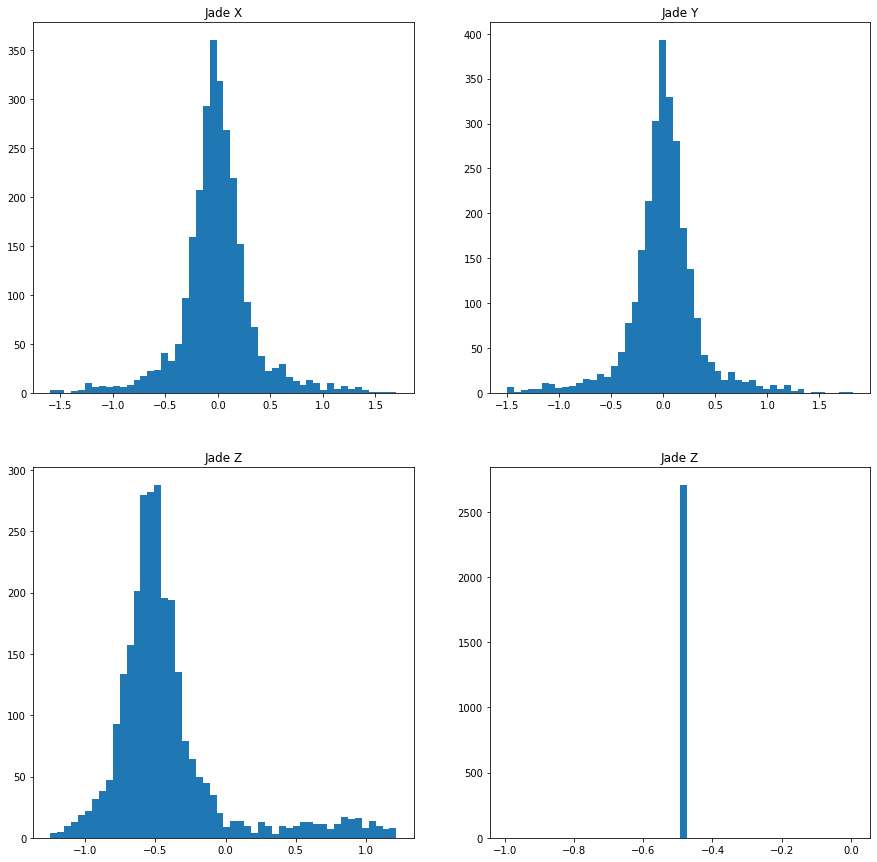

 69%|██████▉   | 9/13 [00:10<00:04,  1.18s/it]

(2446, 3) 1520


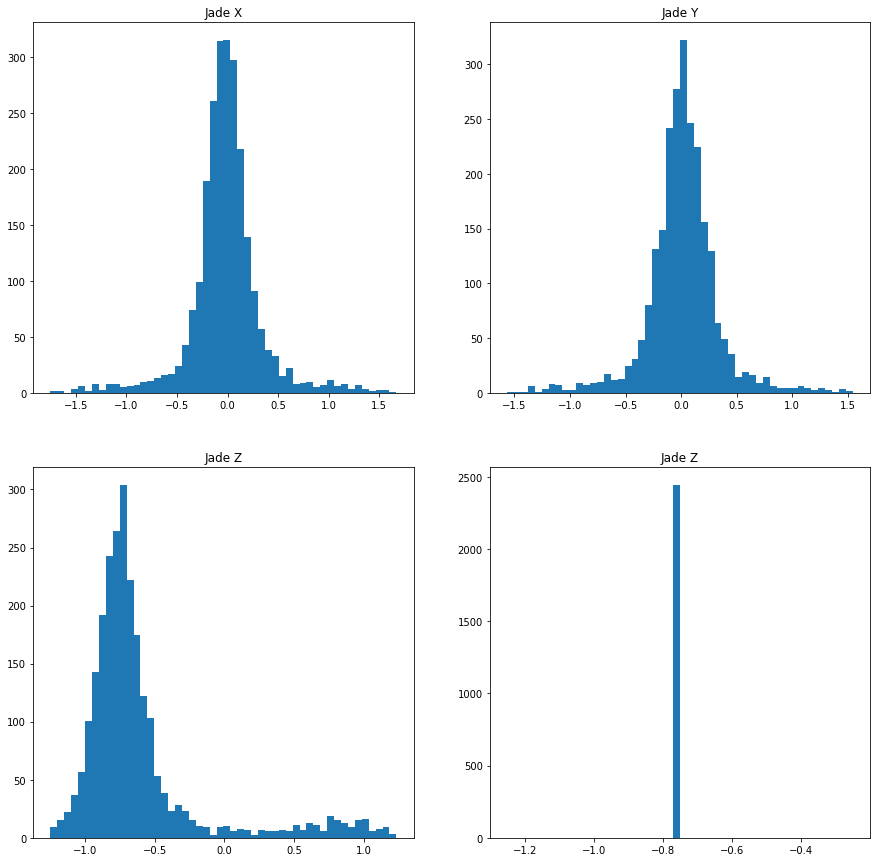

 77%|███████▋  | 10/13 [00:11<00:03,  1.18s/it]

(1668, 3) 1521


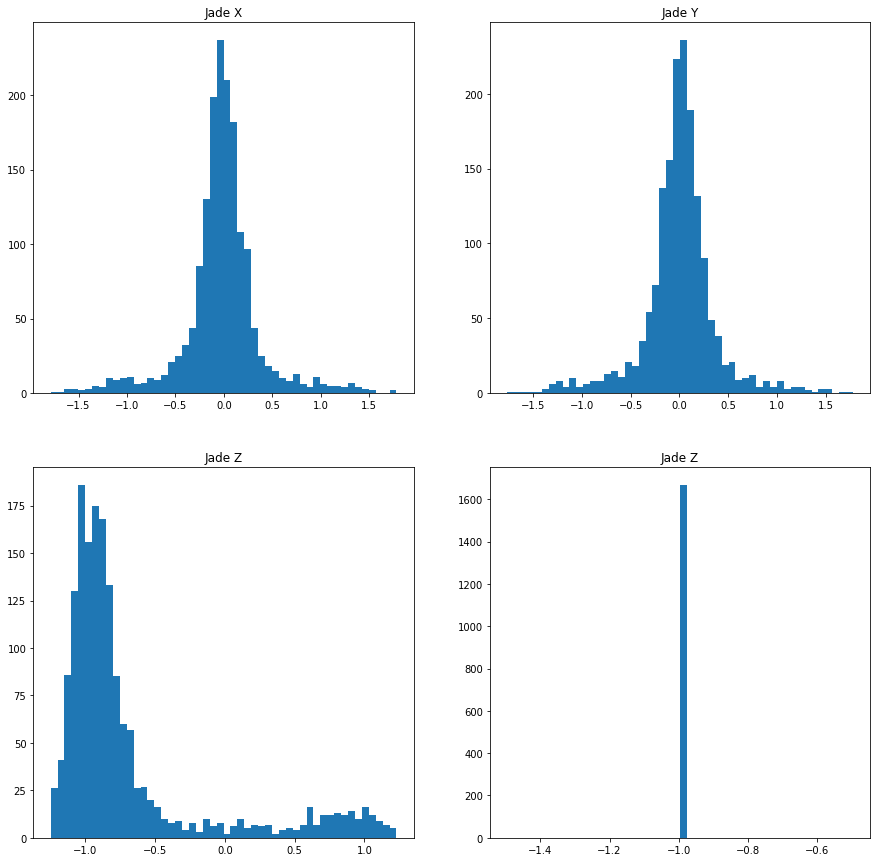

 85%|████████▍ | 11/13 [00:12<00:02,  1.17s/it]

(834, 3) 1522


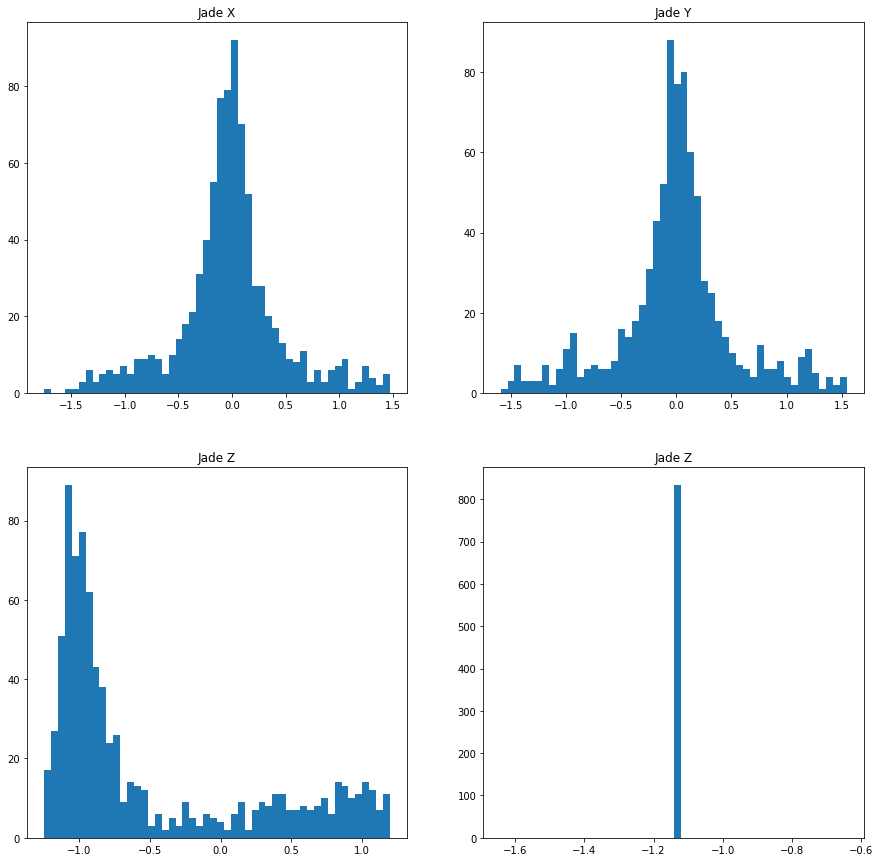

 92%|█████████▏| 12/13 [00:14<00:01,  1.15s/it]

(527, 3) 1523


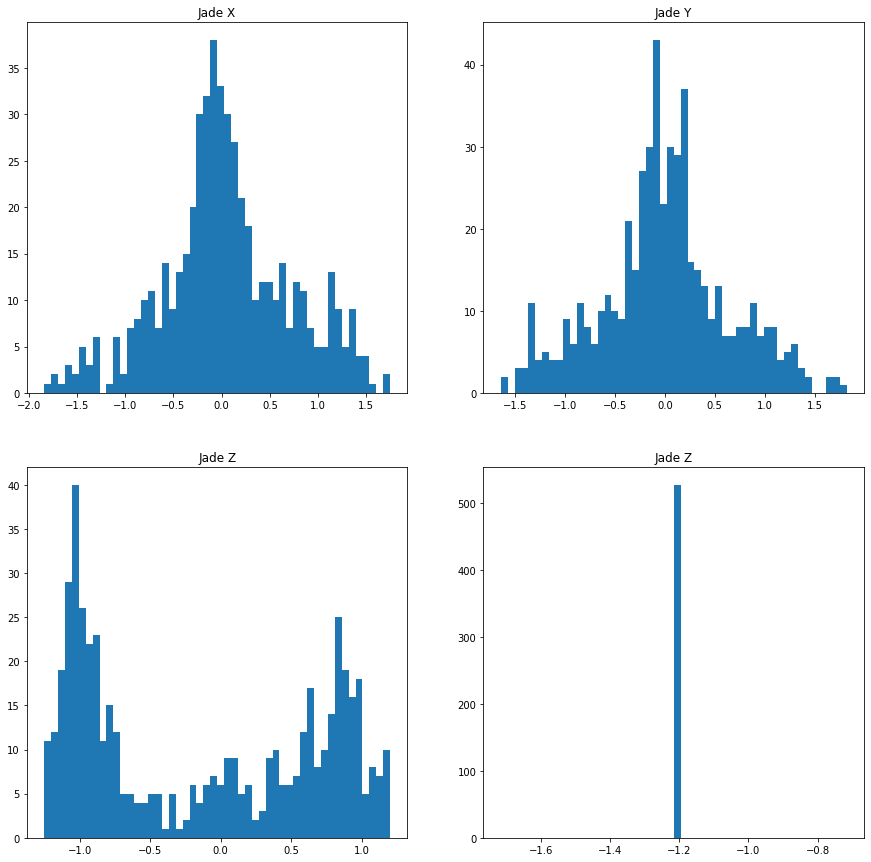

100%|██████████| 13/13 [00:15<00:00,  1.17s/it]


In [5]:

run_nums = [1506, 1509, 1510, 1511, 1512, 1513, 1517, 1518, 1519, 1520,1521,1522,1523]
real_vtxs = [1.218, 1.156, 1.010, 0.752, 0.508, 0.251, 0.007, -0.249, -0.494, -0.751, -0.996, -1.142, -1.216]


a = 0
for runs in tqdm(range(len(run_nums))):
    run_num = run_nums[runs]
    
    
    
    energy_all = np.empty([0])
    vtx_all = np.empty([0,3])
    x_all = np.empty([0])
    y_all = np.empty([0])
    z_all = np.empty([0])
    dT_all = np.empty([0])
    dV_all = np.empty([0])
    PC_all = np.empty([0,96])
      

    for i in range(53):

        data_file = path + 'comb.debug.r00'+str(run_num)+'.f'+ '{0:05d}'.format(i)+'.root'

        real_vtx = real_vtxs[runs]
#         if files[i].split('.')[2][3:] == str(run_num):
#             file_id = files[i].split('.')[-2][-5:]
            
        file = uproot.open(data_file)
        energy = (np.array(file['comTree']['RecoFlux'])/(5200/8))
        vtx = np.array(file['comTree']['RecoVertex']).T
        dT = np.array(file['comTree']['Var1'])
        dV = np.array(file['comTree']['Var2'])
        PC = np.array(file['comTree']['PMTCharge'])
        
        energy_all = np.concatenate([energy_all, energy])
        vtx_all = np.concatenate([vtx_all, np.repeat(np.array([0,0,real_vtx]).reshape(3,1),PC.shape[0],axis=1).T.reshape(-1,3)])
  
        x_all = np.concatenate([x_all, vtx[0]])
        y_all = np.concatenate([y_all, vtx[1]])
        z_all = np.concatenate([z_all, vtx[2]])
        dT_all = np.concatenate([dT_all, dT])
        dV_all = np.concatenate([dV_all, dV])

        PC_all = np.concatenate([PC_all, PC])
        

    selec = ((np.abs(z_all) < 1.25) & (energy_all >6) &(energy_all < 10))
    XX = x_all[selec]
    YY = y_all[selec]
    ZZ = z_all[selec]

    pmts_charge = PC_all[selec].reshape(-1,96,1)

    real_vtx = vtx_all.reshape(-1,3)[selec]

    jade_vtx = np.concatenate((XX.reshape(-1,1),YY.reshape(-1,1),ZZ.reshape(-1,1)),axis = 1)
    print(jade_vtx.shape,run_num)
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.subplot(2,2,1)
    plt.hist(jade_vtx[:,0],bins=50)
    plt.title('Jade X')
    # plt.show()
    plt.subplot(2,2,2)
    plt.hist(jade_vtx[:,1],bins=50)
    plt.title('Jade Y')
    # plt.show()
    plt.subplot(2,2,3)
    plt.hist(jade_vtx[:,2],bins=50)
    plt.title('Jade Z')
    
    plt.subplot(2,2,4)
    plt.hist(real_vtx[:,2],bins=50)
    plt.title('Jade Z')
    plt.show()
    a +=jade_vtx.shape[0]
    kwargs = {'dtype':'f4', 'compression':'lzf'}
    
    output = '/store/hep/users/yewzzang/JSNS2/cf_data_pair/'+ 'r00'+str(run_num)+'_cf_data'+'.h5'
    
    with h5py.File(output, 'w', libver='latest', swmr=True) as fout:

        g = fout.create_group('events')
        g.create_dataset('jade_vertex', data=jade_vtx, chunks=(1,3),**kwargs)
        g.create_dataset('vertex', data=real_vtx, chunks=(1,3),**kwargs)
        g.create_dataset('pmtQ',data=pmts_charge,chunks=(1,96,1),**kwargs)


In [ ]:
a

In [ ]:

run_nums = [1506, 1509, 1510, 1511, 1512, 1513, 1517, 1518, 1519, 1520,1521,1522,1523]
real_vtxs = [1.218, 1.156, 1.010, 0.752, 0.508, 0.251, 0.007, -0.249, -0.494, -0.751, -0.996, -1.142, -1.216]

kk = 0
run_num = run_nums[kk]
real_vtx = real_vtxs[kk]


energy_all=[]
x_all=[]
y_all=[]
z_all=[]
dT_all = []
dV_all = []
PC_all = []
vtx_all = []

for i in range(53):

    data_file = path + 'comb.debug.r00'+str(run_num)+'.f'+ '{0:05d}'.format(i)+'.root'


#         if files[i].split('.')[2][3:] == str(run_num):
#             file_id = files[i].split('.')[-2][-5:]

    file = uproot.open(data_file)

    for j in range(len(np.array(file['comTree']['Var1']))):
        energy = (np.array(file['comTree']['RecoFlux'])/(5200/8))[j]
        vtx = np.array(file['comTree']['RecoVertex']).T[:,j]
        dT = np.array(file['comTree']['Var1'])[j]
        dV = np.array(file['comTree']['Var2'])[j]
        PC = np.array(file['comTree']['PMTCharge'])[j]

        energy_all.append(energy)
        vtx_all.append(np.array([0,0,real_vtx]))

        x_all.append(vtx[0])
        y_all.append(vtx[1])
        z_all.append(vtx[2])
        dT_all.append(dT)
        dV_all.append(dV)
        PC_all.append(PC)




    selec = ((np.abs(np.array(z_all)) < 1.25) & (np.array(energy_all) >6) &(np.array(energy_all) < 10))

    energys = np.array(energy_all)[selec]
    XX = np.array(x_all)[selec]
    YY = np.array(y_all)[selec]
    ZZ = np.array(z_all)[selec]
    pmts_charge = np.array(PC_all)[selec].reshape(-1,96,1)
    real_vtx = np.array(vtx_all)[selec]

    jade_vtx = np.concatenate((XX.reshape(-1,1),YY.reshape(-1,1),ZZ.reshape(-1,1)),axis = 1)


In [ ]:
len(jade_vtx)

In [ ]:

plt.rcParams['figure.figsize'] = (15, 15)
plt.subplot(2,2,1)
plt.hist(XX,bins=50)
plt.title('Jade X')
# plt.show()
plt.subplot(2,2,2)
plt.hist(jade_vtx[:,1],bins=50)
plt.title('Jade Y')
# plt.show()
plt.subplot(2,2,3)
plt.hist(jade_vtx[:,2],bins=50)
plt.title('Jade Z')
plt.show()
# plt.show()
# plt.subplot(2,2,4)
# plt.hist(np.array(energy_all)[selec],bins=50)
# plt.title('Energy')
# plt.show()